In [58]:
import sounddevice as sd
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy import signal
from scipy.signal import butter, lfilter

sd.play(data, sample_rate)

In [59]:
wav = '2014-03-17-09-45-16_Realtek.wav' # Original file

sample_rate, data = wavfile.read(wav) # sr : sampling rate, x : wave data array

print("Sample rate:{0}, data size:{1}, duration:{2} seconds".format(sample_rate,data.shape,len(data)/sample_rate))


Sample rate:16000, data size:(182400,), duration:11.4 seconds


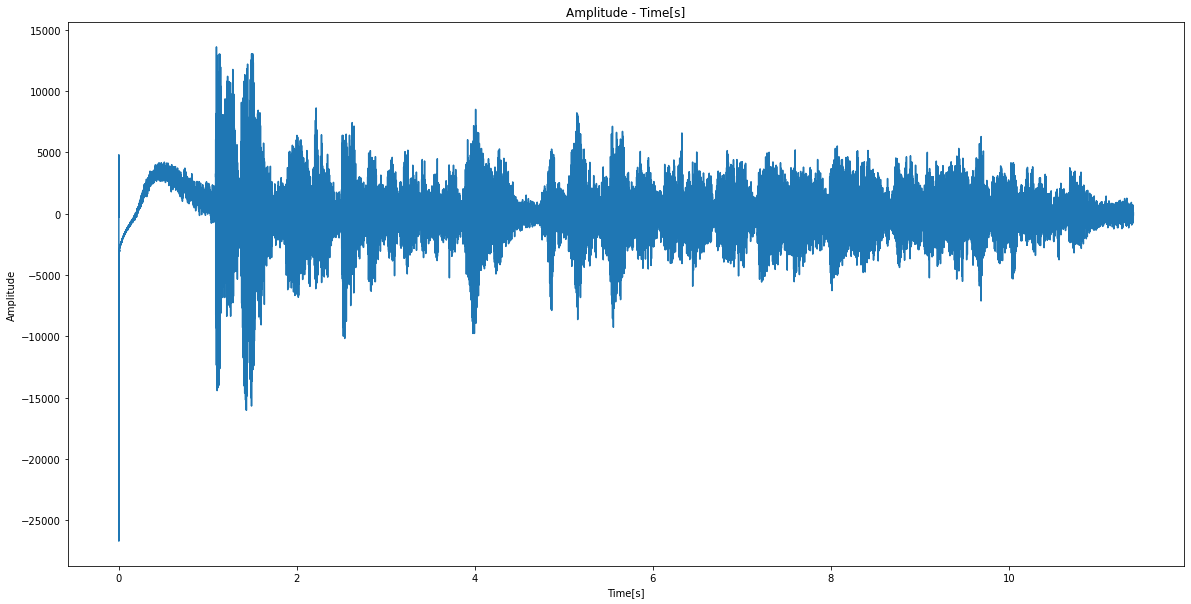

In [60]:
time = np.linspace(0, len(data)/sample_rate, len(data))

plt.figure(figsize=(20,10))
plt.plot(time, data)
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("Amplitude - Time[s]")
plt.show()

# apply high pass filter

Text(0.5, 1.0, 'Power spectrum')

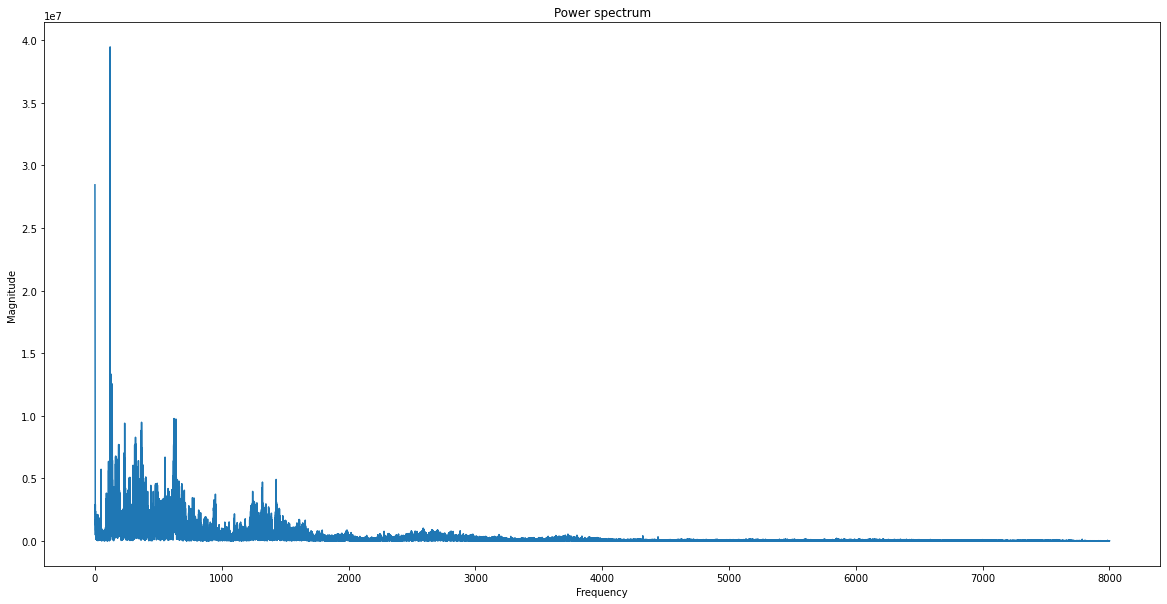

In [62]:
fft = np.fft.fft(data)

magnitude = np.abs(fft) 

f = np.linspace(0, sample_rate, len(magnitude))
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=(20,10))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [63]:
b = signal.firwin(101, cutoff=300, fs=sample_rate, pass_zero='highpass')
# Length of the filter : odd number
# cutoff : Cutoff frequency of filter,
# fs : sampling frequdncy
# pass_zero{True, False,'bandpass','lowpass','highpass','bandstop'}, optional

data1 = signal.lfilter(b, [1.0], data)

Text(0.5, 1.0, 'Power spectrum')

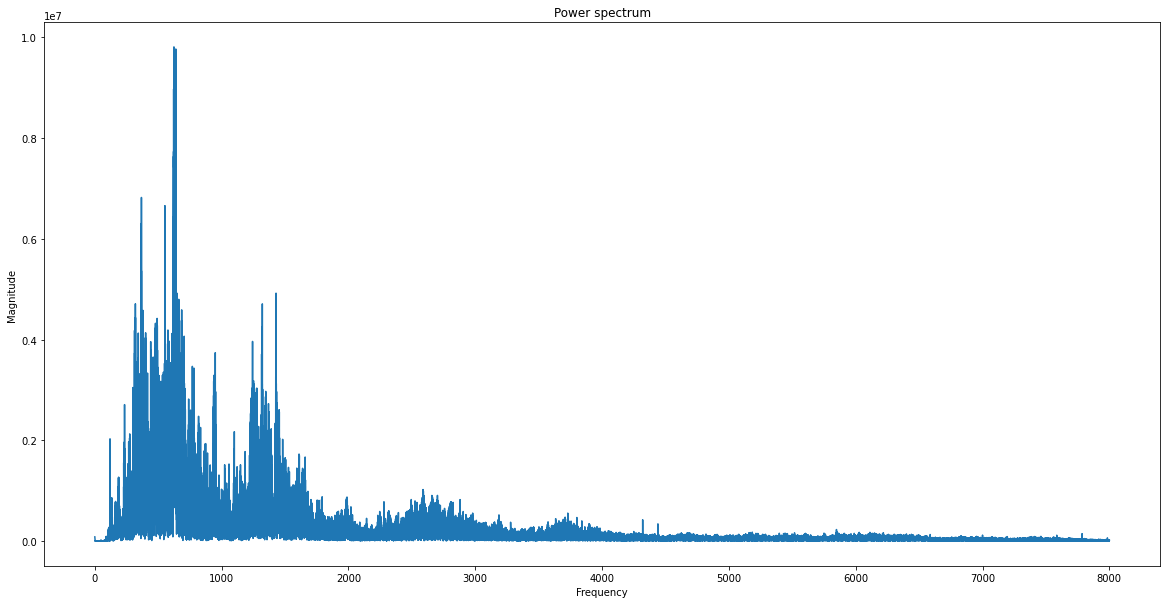

In [64]:
fft = np.fft.fft(data1)

magnitude = np.abs(fft) 

f = np.linspace(0, sample_rate, len(magnitude))
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=(20,10))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

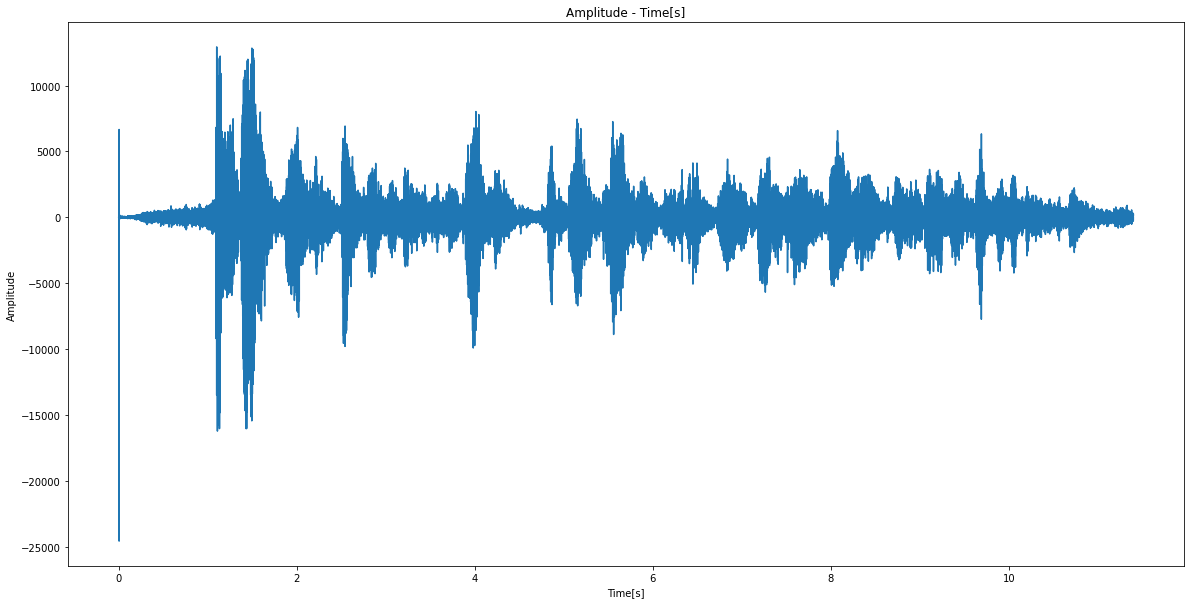

In [65]:
time = np.linspace(0, len(data1)/sample_rate, len(data1))

plt.figure(figsize=(20,10))
plt.plot(time, data1)
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("Amplitude - Time[s]")
plt.show()

In [66]:
sd.play(data1, sample_rate)

# apply low pass filter

In [68]:
b = signal.firwin(101, cutoff=2000, fs=sample_rate, pass_zero='lowpass')
# Length of the filter : odd number
# cutoff : Cutoff frequency of filter,
# fs : sampling frequdncy
# pass_zero{True, False,'bandpass','lowpass','highpass','bandstop'}, optional

data1 = signal.lfilter(b, [1.0], data)

Text(0.5, 1.0, 'Power spectrum')

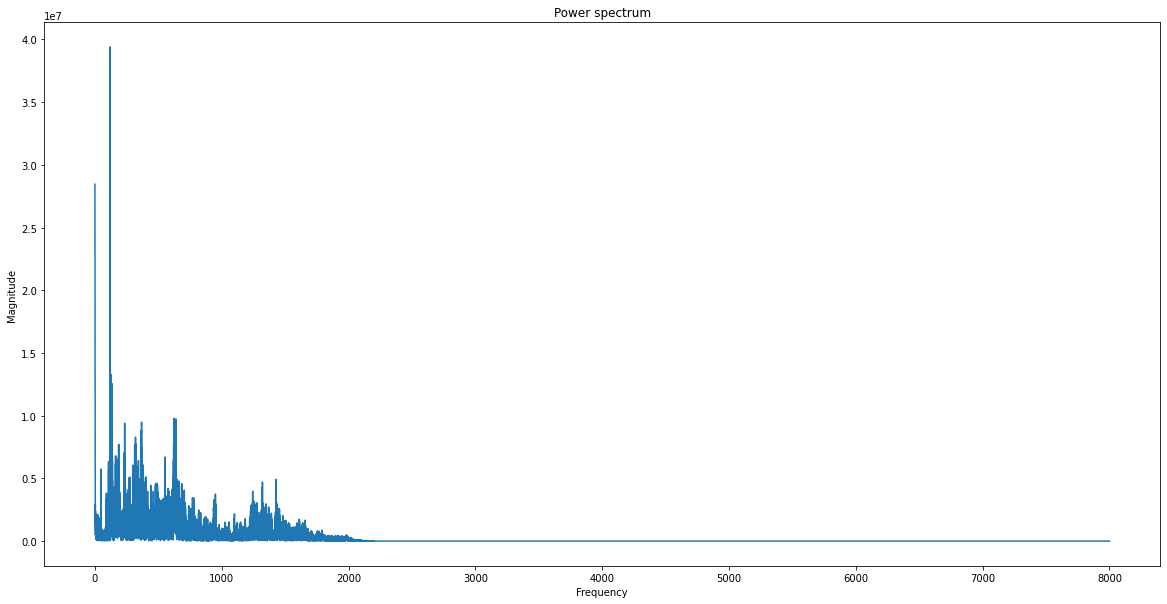

In [69]:
fft = np.fft.fft(data1)

magnitude = np.abs(fft) 

f = np.linspace(0, sample_rate, len(magnitude))
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=(20,10))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

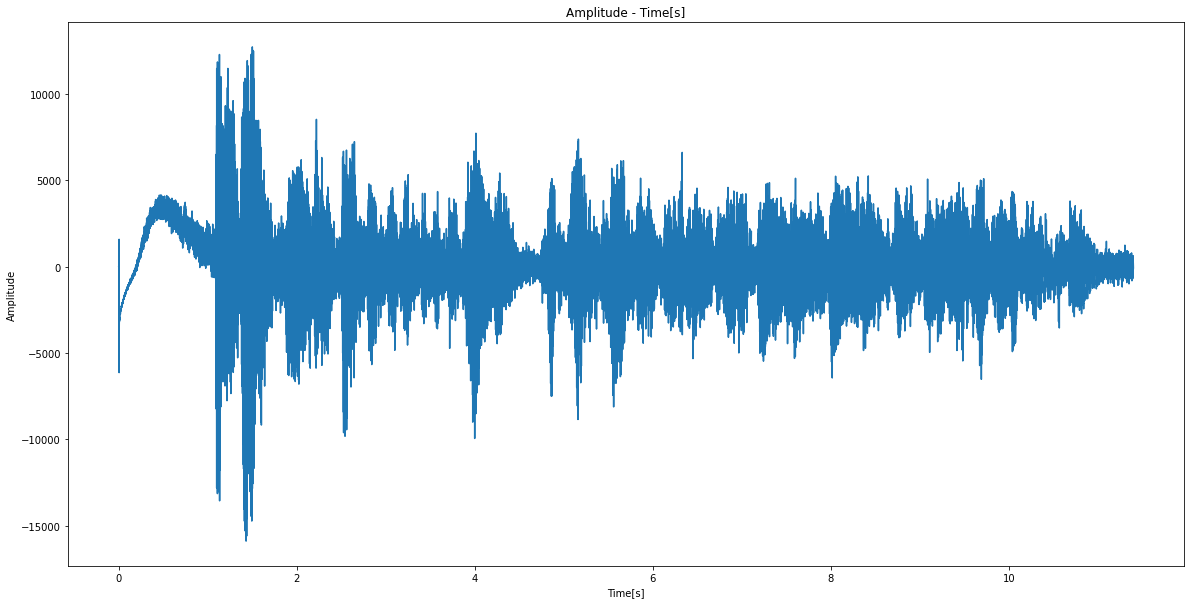

In [70]:
time = np.linspace(0, len(data1)/sample_rate, len(data1))

plt.figure(figsize=(20,10))
plt.plot(time, data1)
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("Amplitude - Time[s]")
plt.show()

In [71]:
sd.play(data1, sample_rate)

# apply notch filter (60Hz)

In [73]:
def notch_filter(data, center, interval=20, sr=44100, normalized=False):
    center = center/(sr/2) if normalized else center
    b, a = signal.iirnotch(center, center/interval, sr)
    filtered_data = signal.lfilter(b, a, data)
    return filtered_data

#return filtered data with (60 Hz) stopband
notch_filtered_data = notch_filter(data, 60, 20, sample_rate)

Text(0.5, 1.0, 'Power spectrum')

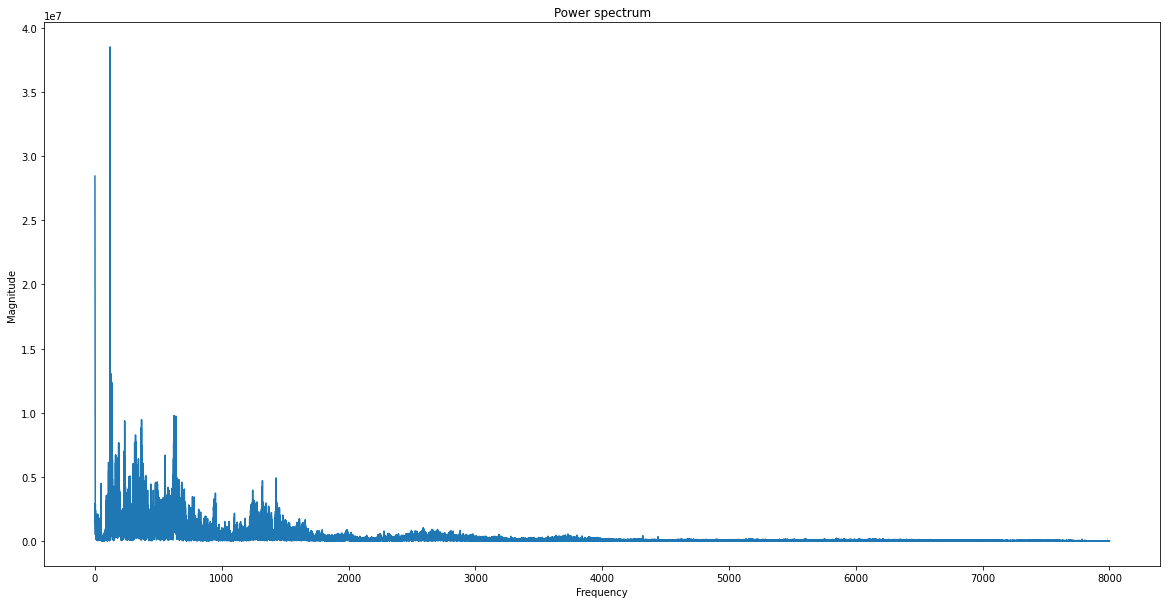

In [74]:
fft = np.fft.fft(notch_filtered_data)

magnitude = np.abs(fft) 

f = np.linspace(0, sample_rate, len(magnitude))
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=(20,10))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

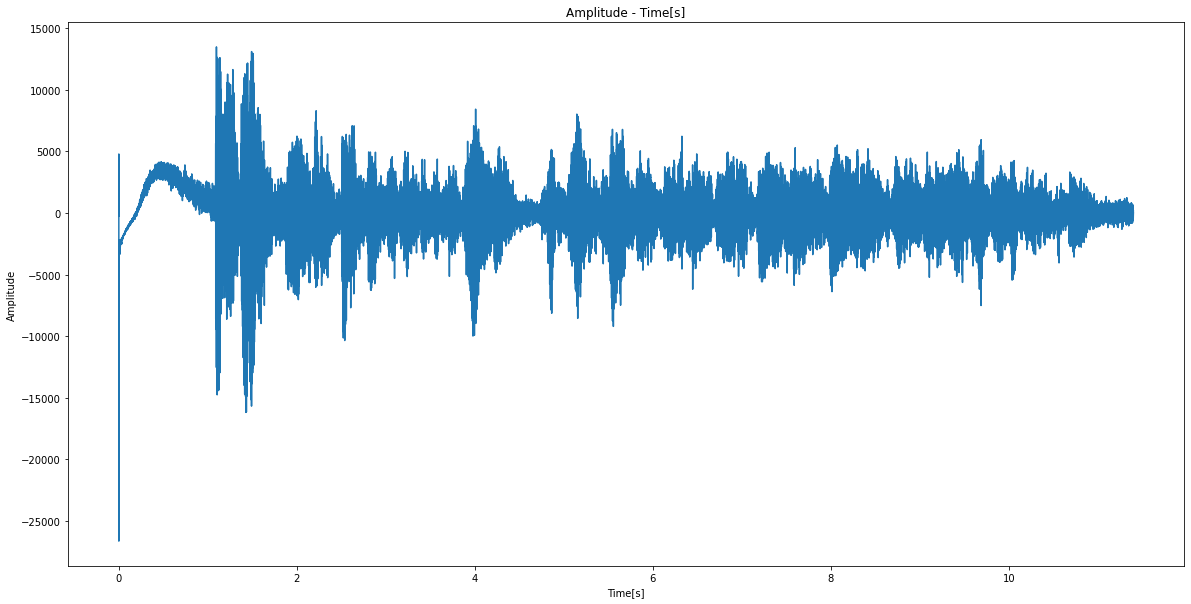

In [75]:
time = np.linspace(0, len(notch_filtered_data)/sample_rate, len(notch_filtered_data))

plt.figure(figsize=(20,10))
plt.plot(time, notch_filtered_data)
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("Amplitude - Time[s]")
plt.show()

In [76]:
sd.play(notch_filtered_data, sample_rate)

# apply band pass filter

In [81]:
lowcut = 200.0
highcut = 2000.0
FRAME_RATE = 16000

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def bandpass_filter(buffer):
    return butter_bandpass_filter(buffer, lowcut, highcut, FRAME_RATE, order=6)

samplerate, data = wavfile.read(wav)
assert samplerate == FRAME_RATE
band_filtered = np.apply_along_axis(bandpass_filter, 0, data).astype('int16')

Text(0.5, 1.0, 'Power spectrum')

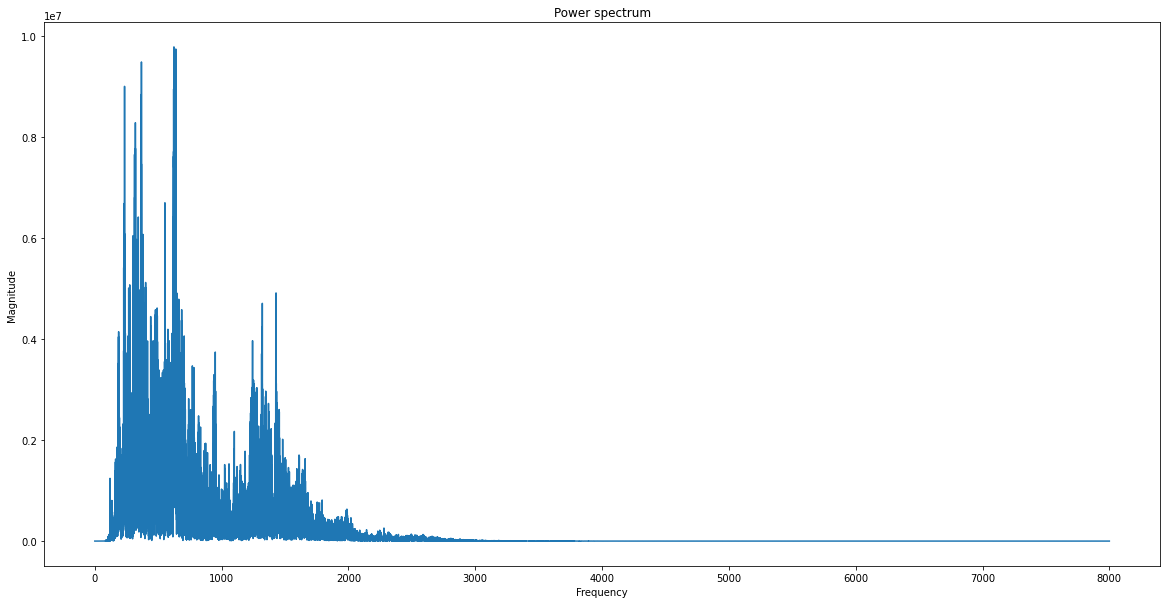

In [82]:
fft = np.fft.fft(band_filtered)

magnitude = np.abs(fft) 

f = np.linspace(0, sample_rate, len(magnitude))
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=(20,10))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

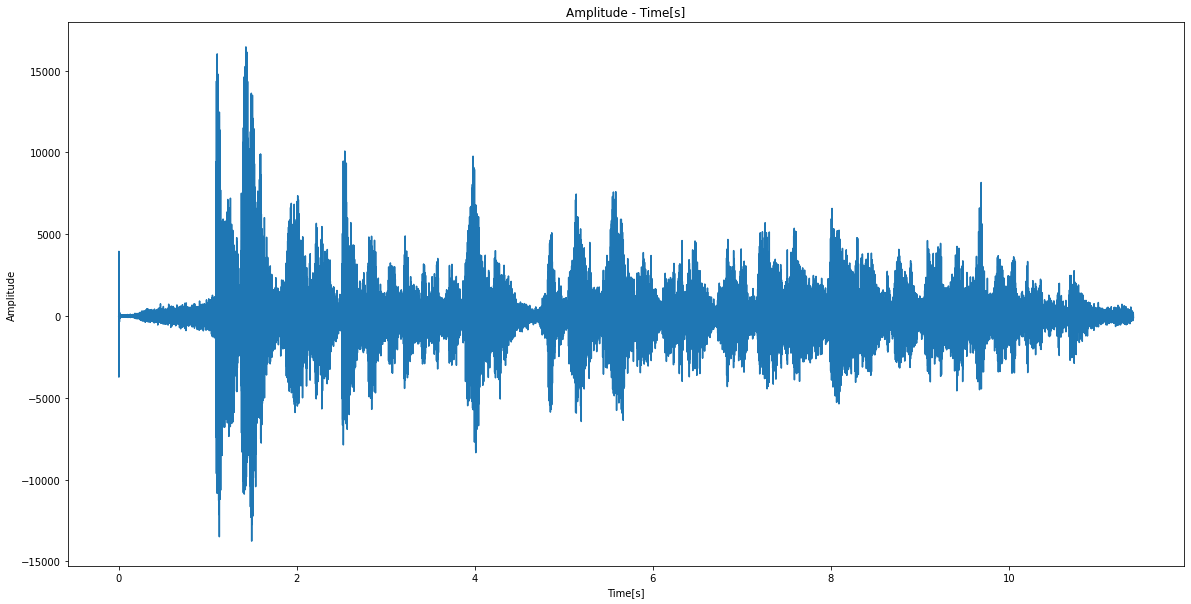

In [83]:
time = np.linspace(0, len(band_filtered)/sample_rate, len(band_filtered))

plt.figure(figsize=(20,10))
plt.plot(time, band_filtered)
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("Amplitude - Time[s]")
plt.show()

In [84]:
sd.play(band_filtered, sample_rate)

# band pass filter is the fittest one